<img src="https://datascibr.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F1e2981f8-e996-4b65-bc32-dd43c6c13d0d%2Fhackathon1.png?table=block&id=69f5ee7f-c32d-49cb-b2b8-fa475342c579&spaceId=b0ad94d1-b13d-42e8-93ff-04ffcc74dc68&width=2000&userId=&cache=v2" style="height: 200px" />

### Resolução das principais etapas em Python

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('dw_vendas.csv')
df.head()

,Unnamed: 0,dim_loj_nome,dim_loj_estado,dim_pro_nome,dim_pro_categoria,dim_pro_familia,dim_tem_dia,dim_tem_mes,dim_tem_ano,fat_ven_quantidade,fat_ven_faturamento
0,0,LOJA1,BA,P1,CAT1,F1,15,1,1999,10.0,20.0
1,1,LOJA1,BA,P2,CAT1,F1,15,1,1999,30.0,40.0
2,2,LOJA1,BA,P3,CAT1,F1,15,1,1999,10.0,20.0
3,3,LOJA1,BA,P1,CAT1,F1,15,2,1999,10.0,20.0
4,4,LOJA1,BA,P2,CAT1,F1,15,2,1999,30.0,40.0


### Etapa 03


- Listar os estados da dimensão DIM_LOJA

In [84]:
dim_loja = df[['dim_loj_nome', 'dim_loj_estado']]
dim_loja

,dim_loj_nome,dim_loj_estado
0,LOJA1,BA
1,LOJA1,BA
2,LOJA1,BA
3,LOJA1,BA
4,LOJA1,BA
5,LOJA1,BA
6,LOJA2,BA
7,LOJA2,BA
8,LOJA2,BA
9,LOJA2,BA


- Listar os estados sem repetição da dimensão DIM_LOJA

In [5]:
dim_loja['dim_loj_estado'].drop_duplicates()

0     BA
11    PB
Name: dim_loj_estado, dtype: object

- Listar o campus da dimensão DIM_LOJA filtrados pelo estado BA

In [6]:
dim_loja.query("dim_loj_estado == 'BA'")

,dim_loj_nome,dim_loj_estado
0,LOJA1,BA
1,LOJA1,BA
2,LOJA1,BA
3,LOJA1,BA
4,LOJA1,BA
5,LOJA1,BA
6,LOJA2,BA
7,LOJA2,BA
8,LOJA2,BA
9,LOJA2,BA


- Calcular o faturamento total da tabela de fatos FAT_VENDAS

In [7]:
df['fat_ven_faturamento'].sum()

1065.0

### Etapa 04

- Criar uma nova coluna de tempo (mês/ano)

In [8]:
df['dim_tem_ano'] = df['dim_tem_ano'].astype(str)
df['dim_tem_mes'] = df['dim_tem_mes'].astype(str)
df['dim_tem_dia'] = df['dim_tem_dia'].astype(str)
df['date'] = pd.to_datetime(df['dim_tem_ano']+'-'+df['dim_tem_mes']+'-'+df['dim_tem_dia'])

In [9]:
df['dim_tem_mes_ano'] = df['date'].dt.strftime('%m/%Y')

In [10]:
df.head()

,Unnamed: 0,dim_loj_nome,dim_loj_estado,dim_pro_nome,dim_pro_categoria,dim_pro_familia,dim_tem_dia,dim_tem_mes,dim_tem_ano,fat_ven_quantidade,fat_ven_faturamento,date,dim_tem_mes_ano
0,0,LOJA1,BA,P1,CAT1,F1,15,1,1999,10.0,20.0,1999-01-15,01/1999
1,1,LOJA1,BA,P2,CAT1,F1,15,1,1999,30.0,40.0,1999-01-15,01/1999
2,2,LOJA1,BA,P3,CAT1,F1,15,1,1999,10.0,20.0,1999-01-15,01/1999
3,3,LOJA1,BA,P1,CAT1,F1,15,2,1999,10.0,20.0,1999-02-15,02/1999
4,4,LOJA1,BA,P2,CAT1,F1,15,2,1999,30.0,40.0,1999-02-15,02/1999


### Etapa 05

- Criar a consulta DAX para retornar o total do faturamento das vendas
referentes a Categoria=“CAT1” (DIM_PRODUTO) e do Estado=“BA” (DIM_LOJA)

In [45]:
keys = ['dim_loj_nome', "dim_pro_categoria", 
        "dim_loj_estado",  'fat_ven_faturamento',
       'dim_tem_mes_ano', 'date']

In [46]:
df_cat1_ba = (
    df.loc[:, keys]
    .query("dim_pro_categoria == 'CAT1' & dim_loj_estado == 'BA'")
    .groupby(['dim_loj_nome', 'dim_tem_mes_ano', 'date'], as_index=False)
    .sum()
    .sort_values(by='date')
)
df_cat1_ba

,dim_loj_nome,dim_tem_mes_ano,date,fat_ven_faturamento
0,LOJA1,01/1999,1999-01-15,80.0
4,LOJA2,01/1999,1999-01-15,60.0
2,LOJA1,02/1999,1999-02-15,60.0
6,LOJA2,02/1999,1999-02-15,60.0
1,LOJA1,01/2000,2000-01-15,98.0
5,LOJA2,01/2000,2000-01-15,71.0
3,LOJA1,02/2000,2000-02-15,100.0
7,LOJA2,02/2000,2000-02-15,94.0


### Etapa 06


- Criar a consulta DAX para retornar o total do faturamento das vendas
referente ao ano de 1999 do estado “BA”.

In [13]:
keys = ['dim_loj_nome', "dim_tem_ano", 
         'dim_pro_categoria', "dim_loj_estado", 
         'fat_ven_faturamento'] 

In [14]:
df_1999_ba = (
    df.loc[:, keys]
    .query("dim_tem_ano == '1999' & dim_loj_estado == 'BA'")
    .groupby(['dim_loj_nome', 'dim_pro_categoria'], as_index=False)
    .sum()
    .sort_values(by='fat_ven_faturamento')
)
df_1999_ba

,dim_loj_nome,dim_pro_categoria,fat_ven_faturamento
1,LOJA1,CAT2,20.0
3,LOJA2,CAT2,20.0
2,LOJA2,CAT1,120.0
0,LOJA1,CAT1,140.0


In [15]:
df_1999_ba

,dim_loj_nome,dim_pro_categoria,fat_ven_faturamento
1,LOJA1,CAT2,20.0
3,LOJA2,CAT2,20.0
2,LOJA2,CAT1,120.0
0,LOJA1,CAT1,140.0


### Etapa 07

- Criar as tabelas referente ao Passo V e VI
- Apresentar as tabelas com os componentes

<img src="https://datascibr.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F2a5296be-e62e-4dbc-8d4f-1f4d74b6bb68%2FpassoVII.png?table=block&id=e15864f4-8386-4975-8a69-e2a5553b476e&spaceId=b0ad94d1-b13d-42e8-93ff-04ffcc74dc68&width=1060&userId=&cache=v2" style="width: 250px" />

In [16]:
def catesian_format(dataframe, key):
    source_obj = {}
    for header in dataframe[key]:
        query = dataframe.query(f'{key} == "{header}"')
        fat_ven = query['fat_ven_faturamento'].to_list()
        source_obj[header] = fat_ven
    
    return pd.DataFrame.from_dict(source_obj)

#### Tabela Cat1 Ba (Etapa 05) 

In [17]:
table_cat1_ba = catesian_format(df_cat1_ba, 'dim_tem_mes_ano')

In [18]:
table_cat1_ba['TOTAL'] = table_cat1_ba.sum(axis=1)
table_cat1_ba.loc[len(table_cat1_ba.index)] = table_cat1_ba.sum()
table_cat1_ba.head()

,01/1999,01/2000,02/1999,02/2000,TOTAL
0,80.0,98.0,60.0,100.0,338.0
1,60.0,71.0,60.0,94.0,285.0
2,140.0,169.0,120.0,194.0,623.0


In [19]:
table_cat1_ba['Nome da Loja'] = ["LOJA1", "LOJA2", "TOTAL"]
table_cat1_ba.head()

,01/1999,01/2000,02/1999,02/2000,TOTAL,Nome da Loja
0,80.0,98.0,60.0,100.0,338.0,LOJA1
1,60.0,71.0,60.0,94.0,285.0,LOJA2
2,140.0,169.0,120.0,194.0,623.0,TOTAL


#### Tabela 1999 BA (Etapa 06)

In [20]:
table_1999_ba = catesian_format(df_1999_ba, 'dim_pro_categoria')
table_1999_ba

,CAT2,CAT1
0,20.0,120.0
1,20.0,140.0


In [21]:
table_1999_ba.loc[len(table_1999_ba.index)] = table_1999_ba.sum()
table_1999_ba['Nome da Loja'] = ['LOJA1', 'LOJA2', 'TOTAL']

In [22]:
table_1999_ba

,CAT2,CAT1,Nome da Loja
0,20.0,120.0,LOJA1
1,20.0,140.0,LOJA2
2,40.0,260.0,TOTAL


#### Gráfico faturamento por ano da categoria 1 na Bahia

<AxesSubplot:xlabel='dim_tem_mes_ano', ylabel='fat_ven_faturamento'>

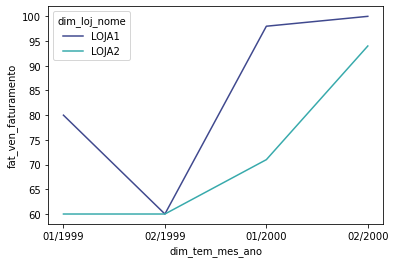

In [49]:
sns.lineplot(data=df_cat1_ba,
             x='dim_tem_mes_ano', 
             y='fat_ven_faturamento', 
             hue='dim_loj_nome',
            palette='mako')

### Etapa 08

- Criar no Power BI uma  nova coluna do tipo data na tabela dimensão DIM_TEM_DIA_MES_ANO

<img src="https://datascibr.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fac066c44-de74-4cc1-b47a-43c0fc42e568%2FUntitled.png?table=block&id=55893a63-668a-493d-a4cc-c0399ec5e321&spaceId=b0ad94d1-b13d-42e8-93ff-04ffcc74dc68&width=1150&userId=&cache=v2" style="height: 250px" />

In [24]:
df['dim_dia_mes_ano'] = df['date'].dt.strftime('%A, %B %d, %Y')
df.head()

,Unnamed: 0,dim_loj_nome,dim_loj_estado,dim_pro_nome,dim_pro_categoria,dim_pro_familia,dim_tem_dia,dim_tem_mes,dim_tem_ano,fat_ven_quantidade,fat_ven_faturamento,date,dim_tem_mes_ano,dim_dia_mes_ano
0,0,LOJA1,BA,P1,CAT1,F1,15,1,1999,10.0,20.0,1999-01-15,01/1999,"Friday, January 15, 1999"
1,1,LOJA1,BA,P2,CAT1,F1,15,1,1999,30.0,40.0,1999-01-15,01/1999,"Friday, January 15, 1999"
2,2,LOJA1,BA,P3,CAT1,F1,15,1,1999,10.0,20.0,1999-01-15,01/1999,"Friday, January 15, 1999"
3,3,LOJA1,BA,P1,CAT1,F1,15,2,1999,10.0,20.0,1999-02-15,02/1999,"Monday, February 15, 1999"
4,4,LOJA1,BA,P2,CAT1,F1,15,2,1999,30.0,40.0,1999-02-15,02/1999,"Monday, February 15, 1999"


### Etapa 09

- Criar uma medida para apresentar o crescimento percentual do faturamento dos estados “BA” e “PB” entre os anos 1999 e 2000.
- Apresentar as tabelas com os componentes

<img src="https://datascibr.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fb6f50066-8b19-463a-b1f9-a34fec048f58%2FpassoIX.png?table=block&id=caef174a-435b-43e4-86d4-11cf9a16c704&spaceId=b0ad94d1-b13d-42e8-93ff-04ffcc74dc68&width=770&userId=&cache=v2" style="width: 250px"/>

In [25]:
total = df['fat_ven_faturamento'].sum()
print(f"Faturamento total: {total}")

Faturamento total: 1065.0


In [26]:
prior_current = (df['dim_tem_ano']
                .drop_duplicates()
                .astype(int)
                .nlargest(2)
                .to_list()[-1])
print(f"Ano anterior ao atual: {prior_current}")

Ano anterior ao atual: 1999


In [27]:
prior_current_total = (df
                       .query(f"dim_tem_ano == '{prior_current}'")
                       .loc[:, 'fat_ven_faturamento']
                       .sum())
print(f"O faturamento total do último ano foi: {prior_current_total}")

O faturamento total do último ano foi: 440.0


In [28]:
yoy = ((total-prior_current_total)/prior_current_total) - 1
print(f"O faturamento Yoy foi: {yoy}")

O faturamento Yoy foi: 0.4204545454545454


#### Tabela faturamento yoy por estado

In [54]:
def calculate_yoy(dataframe, query_string = None):
    if query_string:
        dataframe = dataframe.query(query_string)
        
    total = dataframe['fat_ven_faturamento'].sum()
    
    prior_current = (dataframe['dim_tem_ano']
                     .drop_duplicates()
                     .astype(int)
                     .nlargest(2)
                     .to_list()[-1])
    
    prior_current_total = (dataframe
                           .query(f"dim_tem_ano == '{prior_current}'")
                           .loc[:, 'fat_ven_faturamento']
                           .sum())
    yoy = ((total-prior_current_total)/prior_current_total) - 1
    return yoy

In [55]:
calculate_yoy(df, "dim_loj_estado == 'BA'")

0.20999999999999996

In [56]:
calculate_yoy(df, "dim_loj_estado == 'PB'")

0.8714285714285714

In [63]:
table_faturamento_estado = pd.DataFrame(
    {'Estados': ['BA', 'PB'], 
     'Faturamento yoy %': [
           calculate_yoy(df, "dim_loj_estado == 'BA'") * 100,
           calculate_yoy(df, "dim_loj_estado == 'PB'") * 100
       ]}
).round(2)
table_faturamento_estado

,Estados,Faturamento yoy %
0,BA,21.00
1,PB,87.14


#### Tabela faturamento por ano e estado

In [70]:
keys = ['dim_loj_estado', 'dim_tem_ano', 'fat_ven_faturamento']

In [75]:
year_states = (
    df.loc[:, keys]
    .groupby(['dim_tem_ano', 'dim_loj_estado'],as_index=False)
    .sum()
)
year_states

,dim_tem_ano,dim_loj_estado,fat_ven_faturamento
0,1999,BA,300.0
1,1999,PB,140.0
2,2000,BA,363.0
3,2000,PB,262.0


In [76]:
table_year_states = catesian_format(fat_ano, key="dim_tem_ano")

In [77]:
table_year_states['TOTAL'] = table_year_states.sum(axis=1)
table_year_states['Estados'] = ['BA', 'PB']
table_year_states

,1999,2000,TOTAL,Estados
0,300.0,363.0,663.0,BA
1,140.0,262.0,402.0,PB


#### Gráfico faturamento por ano e estado

<AxesSubplot:xlabel='dim_tem_ano', ylabel='fat_ven_faturamento'>

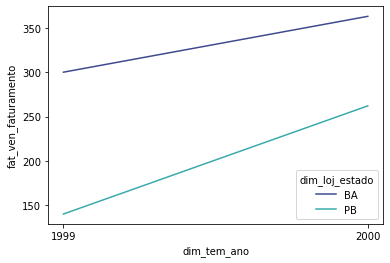

In [82]:
sns.lineplot(data=year_states, 
             x='dim_tem_ano', 
             y='fat_ven_faturamento', 
             hue='dim_loj_estado',
            palette='mako')